In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### Pregunta de examen. ¿Cuando se hace una clasificación binaria por que no funcionan los vecinos pares?
Por que se debe romper, y al tener un valor par podriamos caer en la probabilidad de que no se pueda

In [2]:
digitos=load_digits()
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
len(digitos.feature_names)

64

In [4]:
df = pd.DataFrame(columns=digitos.feature_names, data=digitos.data)
df.insert(loc=len(digitos.feature_names),column='digito', value=digitos.target)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digito
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


# Preprocesamiento de datos utilizando MinMaxScaler
Para q la solucion no dependa de la escala hay que utilizar el MinMaxScaler para escalar en 0-1 para que no haya diferencia.

In [5]:
scaler = MinMaxScaler()
X= scaler.fit_transform(digitos.data)
y= digitos.target

# Entrenamiento y evaluación del modelo

In [6]:
accuracy = np.zeros((10,15), dtype=float)
for h in tqdm(range(10)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y)
    for k in range(1,16):  # Repetir el método de reserva 10 veces
        clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        clf.fit(X_train, y_train)
        accuracy[h,k-1] = clf.score(X_test, y_test)

100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


In [7]:
aciertos=np.mean(accuracy, axis=0)
aciertos

array([0.98681135, 0.98230384, 0.98597663, 0.98180301, 0.98397329,
       0.98146912, 0.98230384, 0.98096828, 0.98063439, 0.97779633,
       0.97796327, 0.97512521, 0.97462437, 0.97295492, 0.97228715])

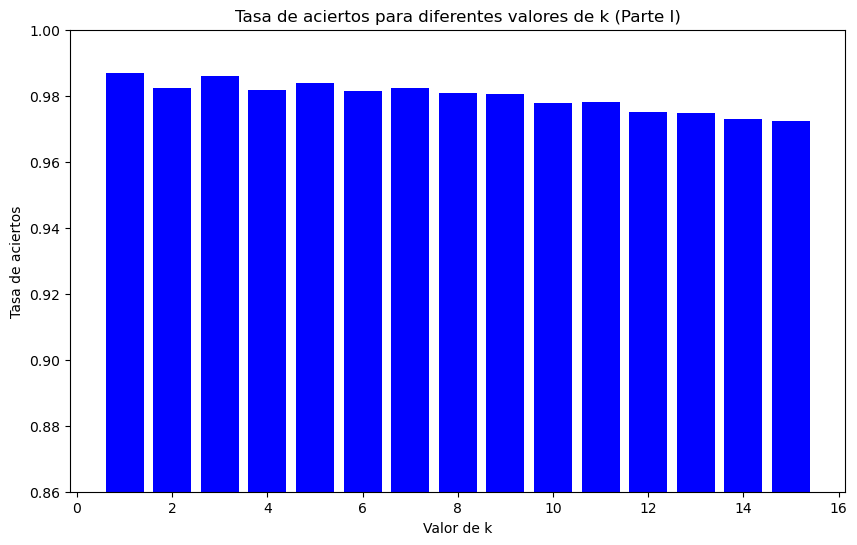

El k óptimo es 1 con una tasa de aciertos de 0.986811352253756.


In [8]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1,16), aciertos, color='blue')
plt.xlabel('Valor de k')
plt.ylabel('Tasa de aciertos')
plt.ylim(0.86, 1.0)
plt.title('Tasa de aciertos para diferentes valores de k (Parte I)')
plt.show()

print(f'El k óptimo es {np.argmax(aciertos) + 1} con una tasa de aciertos de {np.max(aciertos)}.')

# Parte 2

# Entrenamiento y evaluación del modelo
Conviertimos los valores de `X`(matriz de intensidad) en tipo encendido(1), apagado(0)

In [9]:
X_bits=(X>0).astype(int)
accuracy = np.zeros((10,15), dtype=float)
for h in tqdm(range(10)):
    X_train, X_test, y_train, y_test = train_test_split(X_bits, y, test_size=1/3, stratify=y)
    for k in range(1,16):  # Repetir el método de reserva 10 veces
        clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        clf.fit(X_train, y_train)
        accuracy[h,k-1] = clf.score(X_test, y_test)

100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


In [10]:
aciertos=np.mean(accuracy, axis=0)
aciertos

array([0.89282137, 0.88080134, 0.90050083, 0.89983306, 0.90116861,
       0.90350584, 0.90300501, 0.90233723, 0.90200334, 0.90200334,
       0.90133556, 0.89949917, 0.89949917, 0.89933222, 0.89716194])

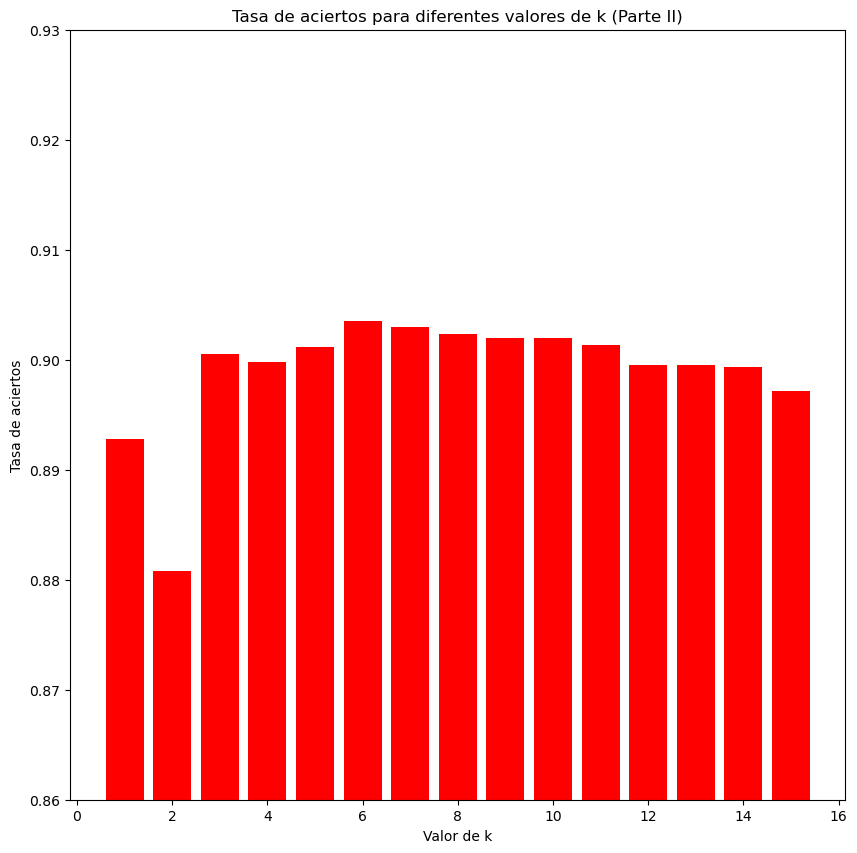

El k óptimo es 6 con una tasa de aciertos de 0.9035058430717864.


In [11]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(1,16), aciertos, color='red')
plt.xlabel('Valor de k')
plt.ylabel('Tasa de aciertos')
plt.ylim(0.86, 0.93)
plt.title('Tasa de aciertos para diferentes valores de k (Parte II)')
plt.show()

print(f'El k óptimo es {np.argmax(aciertos) + 1} con una tasa de aciertos de {np.max(aciertos)}.')